In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("marketing_AB.csv")

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df["converted"] = df["converted"].astype(int)

In [5]:
control = df[df["test group"] == "psa"]["converted"]
treatment = df[df["test group"] == "ad"]["converted"]

In [6]:
print("Control size:", len(control))
print("Treatment size:", len(treatment))

Control size: 23524
Treatment size: 564577


In [7]:
control_rate = control.mean()
treatment_rate = treatment.mean()
diff = treatment_rate - control_rate

print(f"Control Conversion Rate (PSA): {control_rate:.4f}")
print(f"Treatment Conversion Rate (AD): {treatment_rate:.4f}")
print(f"Difference: {diff:.4f}")

Control Conversion Rate (PSA): 0.0179
Treatment Conversion Rate (AD): 0.0255
Difference: 0.0077


In [8]:
t_stat, p_value = stats.ttest_ind(
    treatment,
    control,
    equal_var=False
)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 8.657162314551677
P-value: 5.107607598759073e-18


In [9]:
alpha = 0.05

if p_value < alpha:
    print("✅ Reject H0: Statistically significant difference")
else:
    print("❌ Fail to reject H0: No statistically significant difference")


✅ Reject H0: Statistically significant difference


In [10]:
se_control = control.std() / np.sqrt(len(control))
se_treat = treatment.std() / np.sqrt(len(treatment))

se_diff = np.sqrt(se_control**2 + se_treat**2)

ci_low = diff - 1.96 * se_diff
ci_high = diff + 1.96 * se_diff

print(f"95% CI: ({ci_low:.4f}, {ci_high:.4f})")


95% CI: (0.0060, 0.0094)


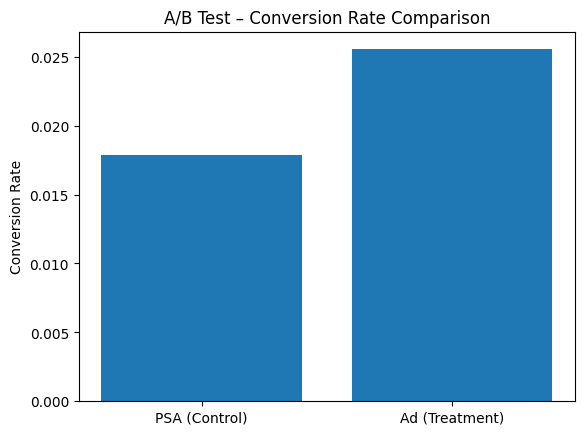

In [11]:
plt.figure()
plt.bar(["PSA (Control)", "Ad (Treatment)"], [control_rate, treatment_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Test – Conversion Rate Comparison")
plt.show()


In [12]:
summary = pd.DataFrame({
    "Group": ["PSA (Control)", "Ad (Treatment)"],
    "Conversion_Rate": [control_rate, treatment_rate],
    "Sample_Size": [len(control), len(treatment)]
})

summary.to_csv("ab_test_summary.csv", index=False)
summary


,Group,Conversion_Rate,Sample_Size
0,PSA (Control),0.017854,23524
1,Ad (Treatment),0.025547,564577


In [13]:
decision = "Reject Null Hypothesis" if p_value < alpha else "Fail to Reject Null Hypothesis"

recommendation = f"""
A/B Testing Results – Marketing Campaign

Control Group (PSA) Conversion Rate: {control_rate:.4f}
Treatment Group (Ad) Conversion Rate: {treatment_rate:.4f}
Difference: {diff:.4f}
P-value: {p_value:.6f}
95% Confidence Interval: ({ci_low:.4f}, {ci_high:.4f})

Decision:
{decision}

Business Recommendation:
"""

if p_value < alpha and diff > 0:
    recommendation += "Run Ad campaign permanently as it significantly improves conversions."
else:
    recommendation += "Do not replace PSA. Ad campaign does not show significant improvement."

with open("final_recommendation.txt", "w") as f:
    f.write(recommendation)

print(recommendation)



A/B Testing Results – Marketing Campaign

Control Group (PSA) Conversion Rate: 0.0179
Treatment Group (Ad) Conversion Rate: 0.0255
Difference: 0.0077
P-value: 0.000000
95% Confidence Interval: (0.0060, 0.0094)

Decision:
Reject Null Hypothesis

Business Recommendation:
Run Ad campaign permanently as it significantly improves conversions.
